In [4]:
#default_exp visualization

In [5]:
#hide
%load_ext autoreload
%autoreload 2

# Visualization

> Methods to visualize data for the PACMEL minining use case

In [9]:
#export
from fastcore.all import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [8]:
#hide
from dvats.imports import *
from dvats.utils import *

### Plot multivariate time series from a dataframe

In [9]:
#export
@delegates(pd.DataFrame.plot)
def plot_TS(df:pd.core.frame.DataFrame, **kwargs):
    df.plot(subplots=True, **kwargs)
    plt.show()

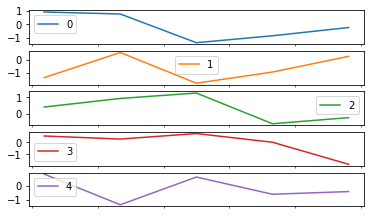

In [10]:
plot_TS(generate_TS_df(5, 5))

In [11]:
#export
def plot_validation_ts_ae(prediction:np.array, original:np.array, title_str = "Validation plot", fig_size = (15,15), anchor = (-0.01, 0.89), window_num = 0, return_fig=True, title_pos = 0.9):
    # Create the figure
    fig = plt.figure(figsize=(fig_size[0],fig_size[1]))
    # Create the subplot axes
    axes = fig.subplots(nrows=original.shape[2], ncols=1)
    # We iterate over the sensor data and plot both the original and the prediction
    for i,ax in zip(range(original.shape[2]),fig.axes):
        ax.plot(original[window_num,:,i], label='Original Data')
        ax.plot(prediction[window_num,:,i], label='Prediction')
    # Handle the legend configuration and position
    lines, labels = fig.axes[-1].get_legend_handles_labels()
    fig.legend(lines, labels,loc='upper left', ncol=2)
    # Write the plot title (and position it closer to the top of the graph)
    fig.suptitle(title_str, y = title_pos)
    # Tight results:
    fig.tight_layout()
    # Returns
    if return_fig:
        return fig
    fig
    return None

In [12]:
input1 = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]],[[13,14,15],[16,17,18]]])
input2 = input1+1


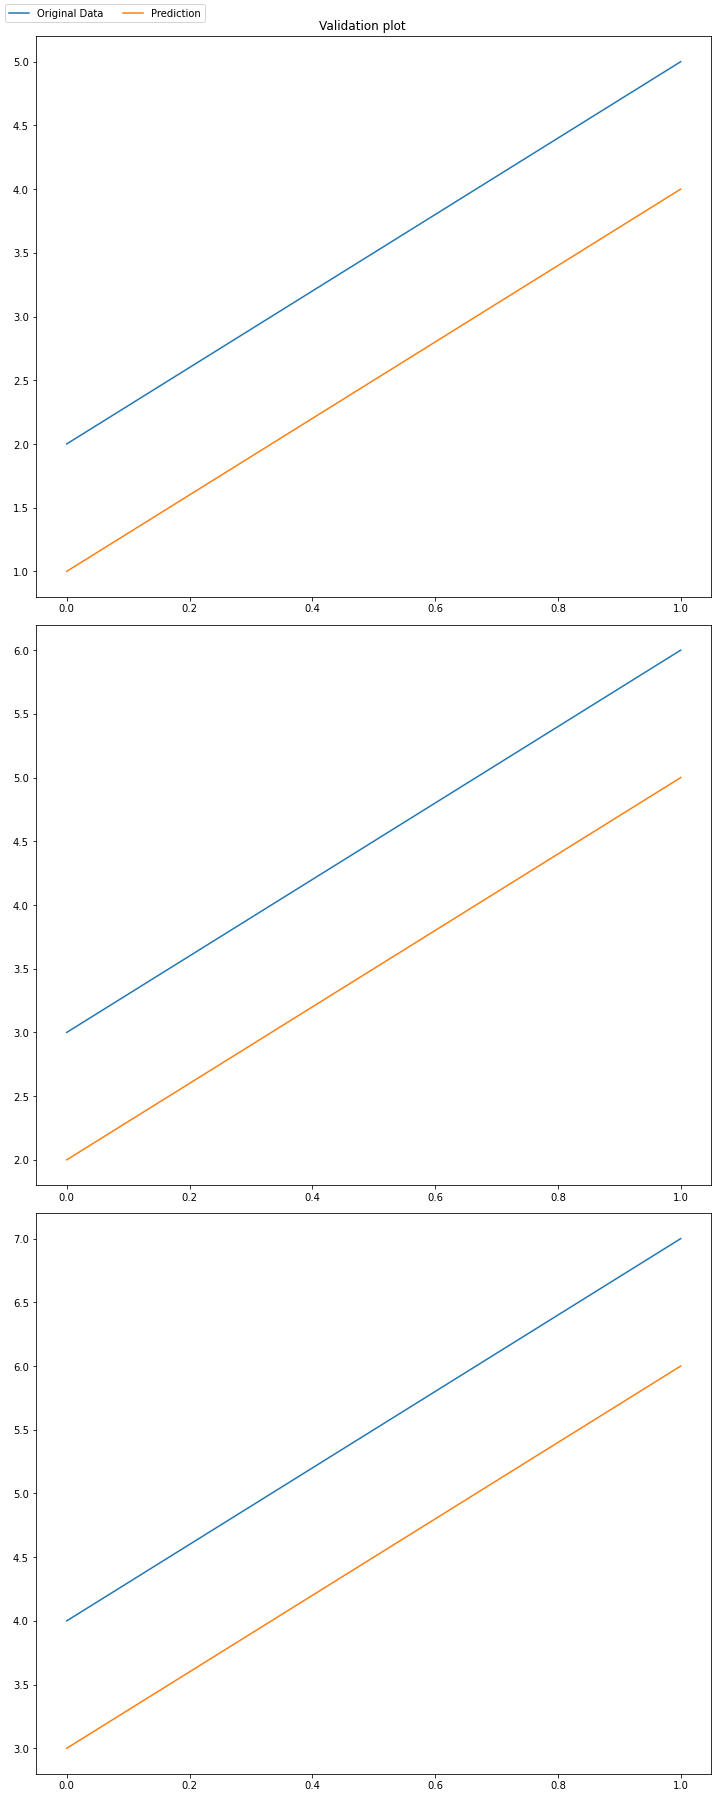

In [13]:
testasd=plot_validation_ts_ae(input1,input2,fig_size = (10,25),window_num=0,return_fig=True,title_pos=0.99)

## Plot mask

In [31]:
#export
def plot_mask(mask, i=0, fig_size=(10,10), title_str="Mask", return_fig=False):
    """
    Plot the mask passed as argument. The mask is a 3D boolean tensor. The first 
    dimension is the window number (or item index), the second is the variable, and the third is the time step.
    Input:
        mask: 3D boolean tensor
        i: index of the window to plot
        fig_size: size of the figure
        title_str: title of the plot
        return_fig: if True, returns the figure
    Output:
        if return_fig is True, returns the figure, otherwise, it does not return anything
    """
    plt.figure(figsize=fig_size)
    plt.pcolormesh(mask[i], cmap='cool')
    plt.title(f'{title_str} {i}, mean: {mask[0].float().mean().item():.3f}')
    if return_fig:
        return plt.gcf()
    else:
        plt.show()
        return None

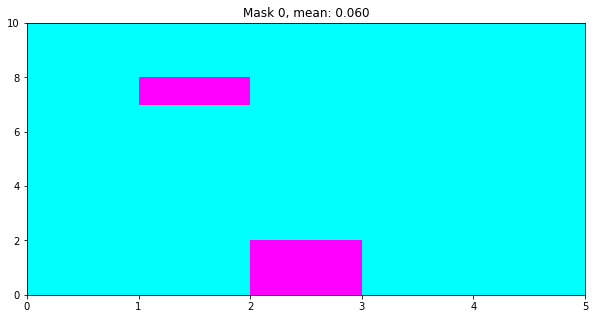

In [24]:
# Creates a mask (3d boolean tensor) with random values masked and call the previous function to plot it
mask = torch.rand(3,10,5) > 0.9
test_eq(mask.dtype, torch.bool)
print(test_eq)
plot_mask(mask, 0, fig_size=(10,5), return_fig=False)


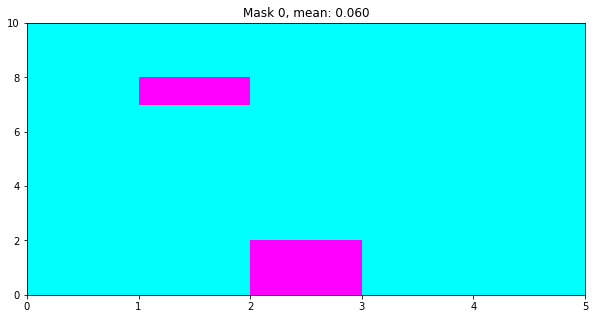

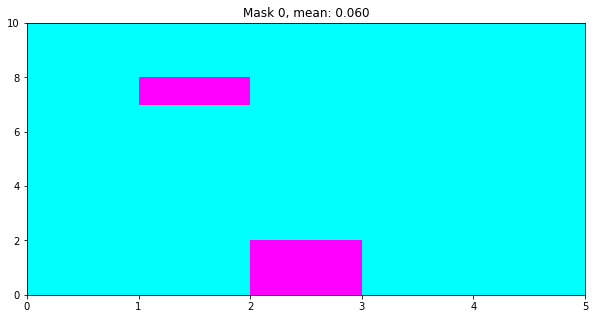

In [29]:
# Test the parameter return_fig
m = plot_mask(mask, 0, fig_size=(10,5), return_fig=True)
m

## Export - 

In [32]:
#hide
from nbdev.export import notebook2script
notebook2script()
beep(1)

Converted dr.ipynb.
Converted encoder.ipynb.
Converted index.ipynb.
Converted load.ipynb.
Converted utils.ipynb.
Converted visualization.ipynb.
